## 4.4.7.2　階層的クラスタリング

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [17]:
iris = load_iris()

data = iris.data
target = iris.target

In [18]:
X = data[:100, [0, 2]]

print(X[:5])

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]]


In [19]:
X_df = pd.DataFrame(iris.data[:100], columns=iris.feature_names)
X_df['Species'] = iris.target[:100]
X_df = X_df.iloc[:, [0, 2, 4]]

X_df.head()

,sepal length (cm),petal length (cm),Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [20]:
X_df.tail()

,sepal length (cm),petal length (cm),Species
95,5.7,4.2,1
96,5.7,4.2,1
97,6.2,4.3,1
98,5.1,3.0,1
99,5.7,4.1,1


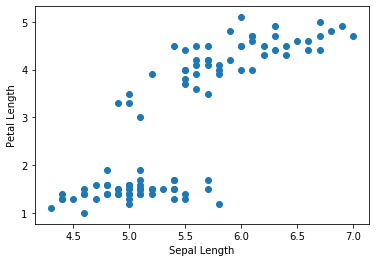

In [21]:
fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1])
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Length')

plt.show()

In [22]:
ac = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
labels = ac.fit_predict(X)

print(labels.shape)
print(labels)

(100,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 2 0 2 0 0 2 0 2 0 2 2
 2 2 2 2 2 0 0 0 0 2 0 2 2 2 0 0 0 2 0 0 0 0 0 2 0 0]


①子クラスタとの関係を抽出する。

In [23]:
children = ac.children_

children_df = pd.DataFrame(children)

print(children_df.shape)
children_df.head(10)

(99, 2)


,0,1
0,0,17
1,1,37
2,12,45
3,4,49
4,6,47
5,5,20
6,9,34
7,19,21
8,39,107
9,38,42


②クラスタ間の距離を抽出する。

In [24]:
distance = np.arange(children.shape[0])

print(distance)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98]


③各データの観測番号を確認する。

In [25]:
no_of_observations = np.arange(2, children.shape[0]+2)

print(no_of_observations)

[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100]


上記3つ（子クラスタ、クラスタ間の距離、観測番号）を列方向に結合する。

In [26]:
linkage_matrix = np.hstack((children, distance[:, np.newaxis], no_of_observations[:, np.newaxis])).astype(float)

pd.DataFrame(linkage_matrix).head(10)

,0,1,2,3
0,0.0,17.0,0.0,2.0
1,1.0,37.0,1.0,3.0
2,12.0,45.0,2.0,4.0
3,4.0,49.0,3.0,5.0
4,6.0,47.0,4.0,6.0
5,5.0,20.0,5.0,7.0
6,9.0,34.0,6.0,8.0
7,19.0,21.0,7.0,9.0
8,39.0,107.0,8.0,10.0
9,38.0,42.0,9.0,11.0


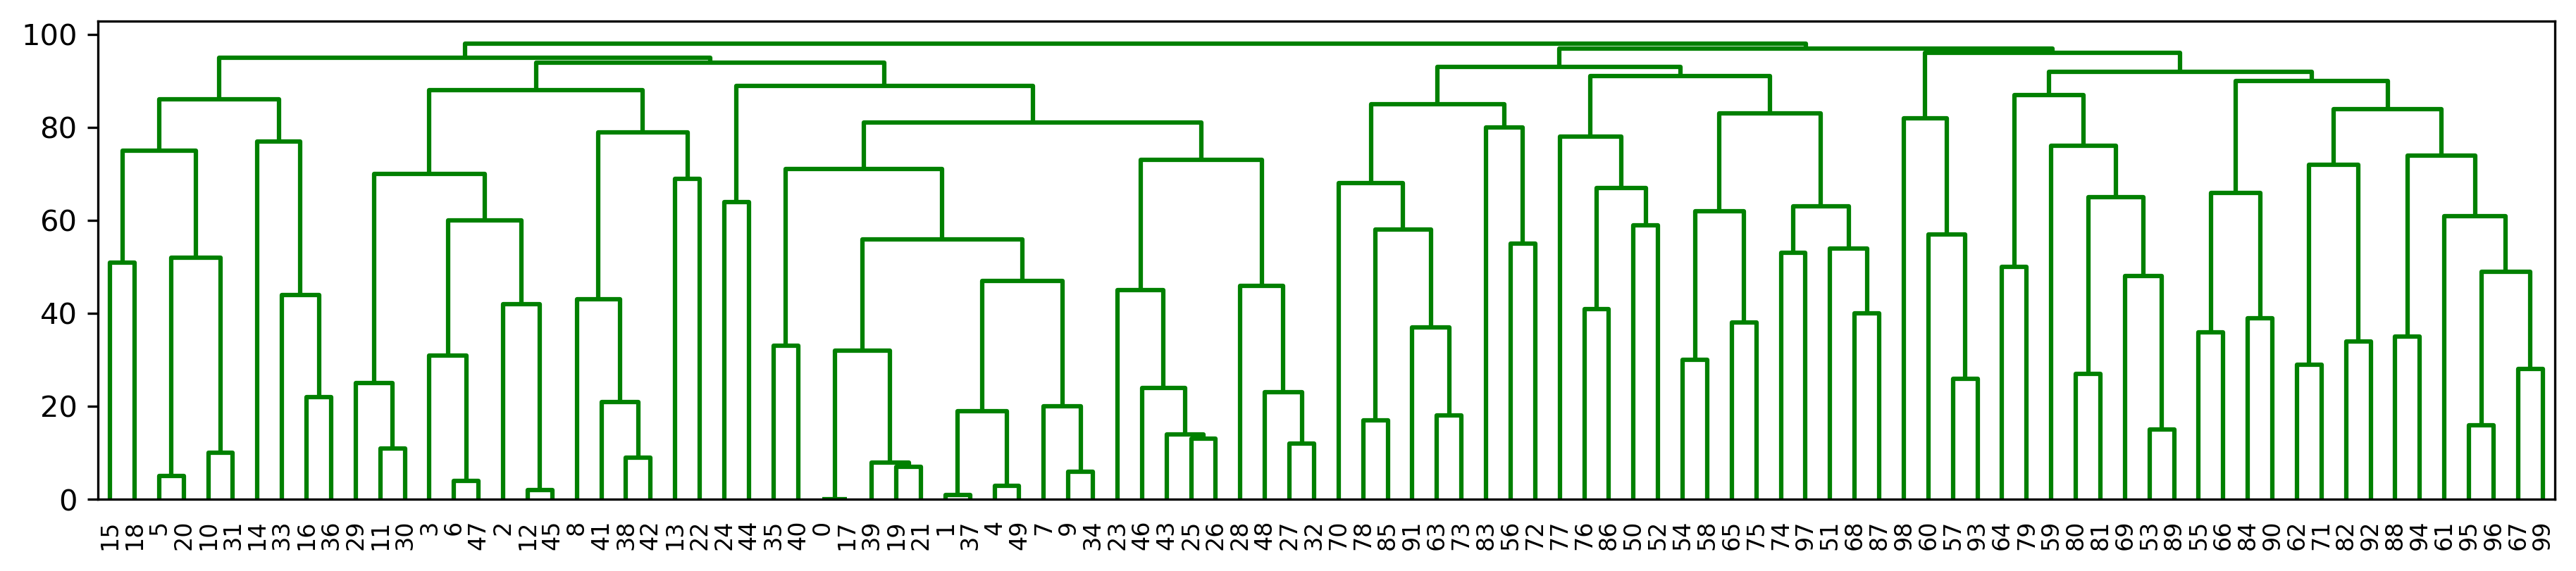

In [27]:
fig, ax = plt.subplots(figsize=(15, 3), dpi=300)

dendrogram(linkage_matrix, labels = np.arange(100), leaf_font_size = 8, color_threshold = np.inf)
plt.show()